In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cities = pd.read_csv('cities.csv')
cities = cities.rename(columns={
    'Longitude deg': 'lat_deg',
    'Longitude min': 'lat_min',
    'Longitude sec': 'lat_sec',
    'Latitude deg': 'long_deg',
    'Latitude min': 'long_min',
    'Latitude sec': 'long_sec'
})
cities = cities.assign(
    Longitude = cities.long_deg + cities.long_min/60 + cities.long_sec/3600,
    Latitude = cities.lat_deg + cities.lat_min/60 + cities.lat_sec/3600
)
cities

,lat_deg,lat_min,lat_sec,long_deg,long_min,long_sec,Population,Country,Capital,Name,Longitude,Latitude
0,55,45,21,37,37,4,12506468,Russia,1,Moscow,37.617778,55.755833
1,40,43,42,-73,-59,-39,8405837,USA,0,New York,-73.994167,40.728333
2,38,53,42,-77,-2,-12,601723,USA,1,Washington,-77.036667,38.895000
3,34,2,0,-118,-16,0,3976322,USA,0,Los Angeles,-118.266667,34.033333
4,-35,-18,-10,149,8,30,356585,Australia,1,Canberra,149.141667,-35.302778
5,-37,-49,-14,144,57,41,4529500,Australia,0,Melbourne,144.961389,-37.820556
6,-33,-27,0,-70,-40,0,5128590,Chile,1,Santiago,-70.666667,-33.450000
7,39,56,0,116,24,0,21705000,China,1,Beijing,116.400000,39.933333
8,31,10,0,121,28,0,24152700,China,0,Shanghai,121.466667,31.166667
9,23,7,39,113,14,50,14000000,China,0,Guangzhou,113.247222,23.127500


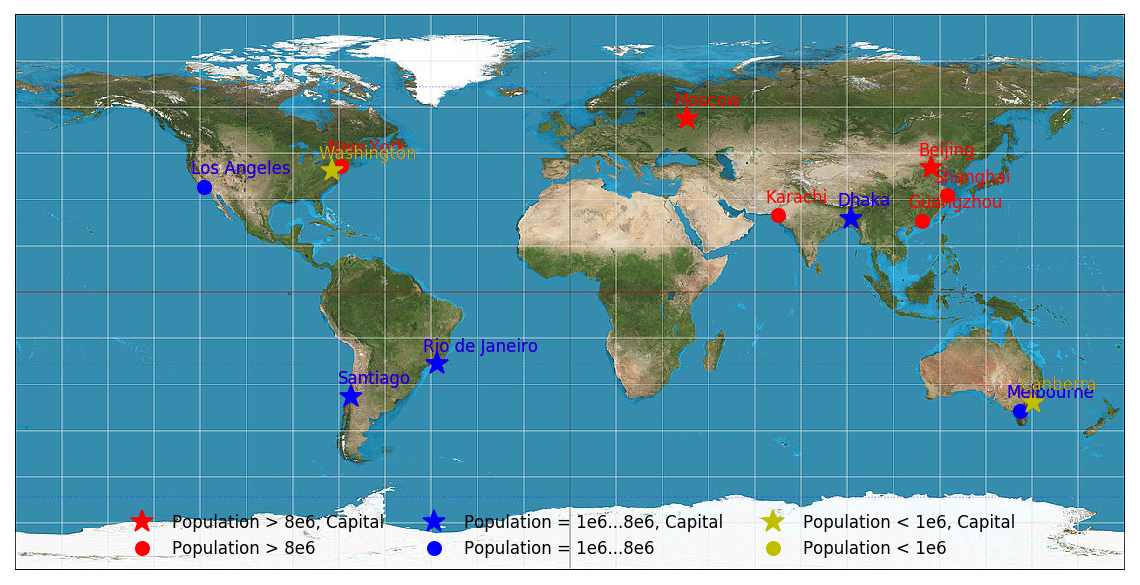

In [3]:
fig, axes = plt.subplots(figsize=(12,8), dpi=120)
with open ('world.jpg', 'rb') as world:
    world = plt.imread(world)
    axes.imshow(world)

width, hight, center = world.shape[1], world.shape[0], (world.shape[1]/2, world.shape[0]/2)

def get_cities(max_population, capital=True, df=cities):
    df = df.query("Population < @max_population & Capital == 1") if capital else \
         df.query("Population < @max_population & Capital == 0")
    return pd.DataFrame({
        'x': df.Longitude * width / 360 + center[0],
        'y': center[1] - df.Latitude * hight / 180, 
        'name': df.Name
    })

xy = get_cities(30e6)
axes.plot(xy.x, xy.y, 'r*', lw=0, ms=14, label='Population > 8e6, Capital')
for x, y, name in zip(xy.x, xy.y, xy.name):
    axes.annotate('{}'.format(name), xy=(x-15, y-15), color='r')
    
xy = get_cities(30e6, False)
axes.plot(xy.x, xy.y, 'ro', lw=0, ms=8, label='Population > 8e6')
for x, y, name in zip(xy.x, xy.y, xy.name):
    axes.annotate('{}'.format(name), xy=(x-15, y-15), color='r')

xy = get_cities(8e6)
axes.plot(xy.x, xy.y, 'b*', lw=0, ms=14, label='Population = 1e6...8e6, Capital')
for x, y, name in zip(xy.x, xy.y, xy.name):
    axes.annotate('{}'.format(name), xy=(x-15, y-15), color='b')

xy = get_cities(8e6, False)
axes.plot(xy.x, xy.y, 'bo', lw=0, ms=8, label='Population = 1e6...8e6')
for x, y, name in zip(xy.x, xy.y, xy.name):
    axes.annotate('{}'.format(name), xy=(x-15, y-15), color='b')

xy = get_cities(1e6)
axes.plot(xy.x, xy.y, 'y*', lw=0, ms=14, label='Population < 1e6, Capital')
for x, y, name in zip(xy.x, xy.y, xy.name):
    axes.annotate('{}'.format(name), xy=(x-15, y-15), color='y')

xy = get_cities(1e6, False)
axes.plot(xy.x, xy.y, 'yo', lw=0, ms=8, label='Population < 1e6')
for x, y, name in zip(xy.x, xy.y, xy.name):
    axes.annotate('{}'.format(name), xy=(x-15, y-15), color='y')

axes.set_axis_off()
axes.legend(fontsize=10, ncol=3, loc=8, frameon=False)  



plt.show()